In [19]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

# 1. international-airline-passengers

In [2]:
passengers = pd.read_csv(r"D:\TSML\1._Лекция_tsml\international-airline-passengers.csv")

In [3]:
passengers.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
# обнаружили некорректную строку

passengers[passengers['Month'].apply(lambda x: len(x) != 7)]

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
144,International airline passengers: monthly tota...,NaN


In [5]:
# удалим её

passengers = passengers.drop(index=144)

In [6]:
# для корректного отображения на графике переведем месяца в формат datetime

passengers['Month'] = pd.to_datetime(passengers['Month'], format='%Y-%m')

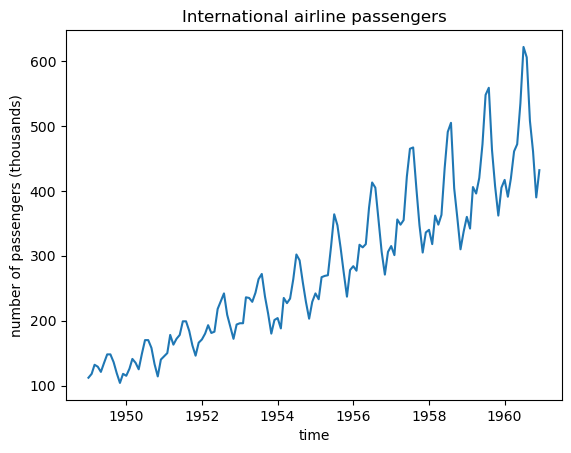

In [10]:
# выведем график

x = passengers.iloc[:, 0]
y = passengers.iloc[:, 1]

plt.plot(x, y)
plt.title('International airline passengers')
plt.xlabel('time')
plt.ylabel('number of passengers (thousands)')
plt.show()

Наблюдаем тренд, напоминающий квадратичную функцию, и сезонность с возрастающей дисперсией

## Логарифмирование
Попробуем нормализовать дисперсию и сделать зависимоть более похожей на линейную

In [17]:
values_ln = boxcox(passengers.iloc[:, 1], 0)

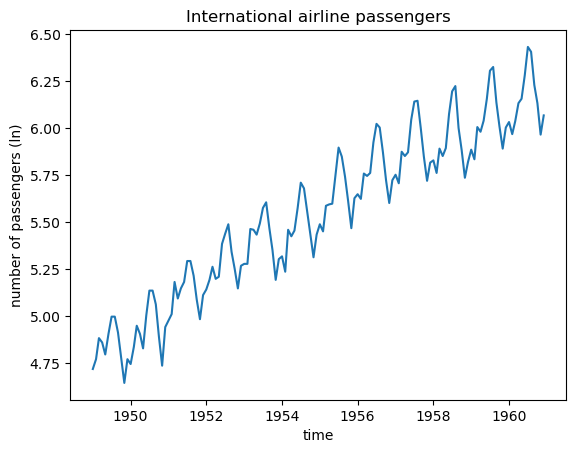

In [18]:
plt.plot(x, values_ln)
plt.title('International airline passengers')
plt.xlabel('time')
plt.ylabel('number of passengers (ln)')
plt.show()

## Дифференцирование
Теперь избавимся от тренда

In [21]:
values_ln_n_diff = np.diff(values_ln, 1)

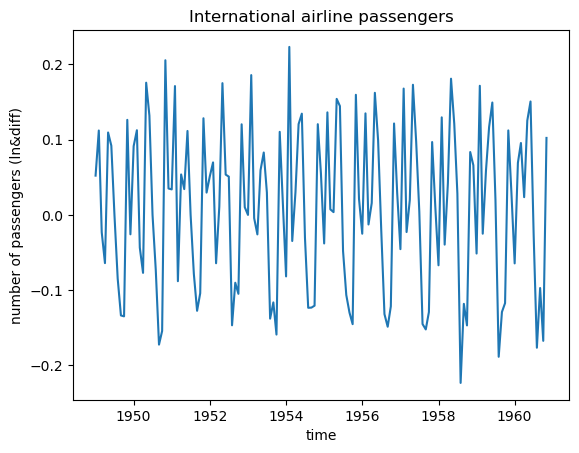

In [23]:
plt.plot(x.drop(index=len(x) - 1), values_ln_n_diff)
plt.title('International airline passengers')
plt.xlabel('time')
plt.ylabel('number of passengers (ln&diff)')
plt.show()

## Проверим на стационарность
Будем использовать готовую функцию из занятия для выведения результата

In [33]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [34]:
test_stationarity(values_ln_n_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


# 2. monthly-car-sales-in-quebec-1960 & monthly-sales-of-company-x-jan-6

In [35]:
quebec = pd.read_csv(r"D:\TSML\1._Лекция_tsml\monthly-car-sales-in-quebec-1960.csv")
quebec.head()

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [36]:
sales = pd.read_csv(r"D:\TSML\1._Лекция_tsml\monthly-sales-of-company-x-jan-6.csv")
sales.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [45]:
# проведем аналогичную работу, только на этот раз реализуем через функции

def make_stationary(df):
    df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], format='%Y-%m')
    
    plt.plot(df.iloc[:, 0], df.iloc[:, 1])
    plt.title('Before processing')
    plt.show()
    
    values_ln = boxcox(df.iloc[:, 1], 0)
    plt.plot(df.iloc[:, 0], values_ln)
    plt.title('After logarithm')
    plt.show()
    
    values_ln_n_diff = np.diff(values_ln, 1)
    plt.plot(df.iloc[:, 0].drop(index=len(df.iloc[:, 0]) - 1), values_ln_n_diff)
    plt.title('After logarithm')
    plt.show()
    
    test_stationarity(values_ln_n_diff)
    

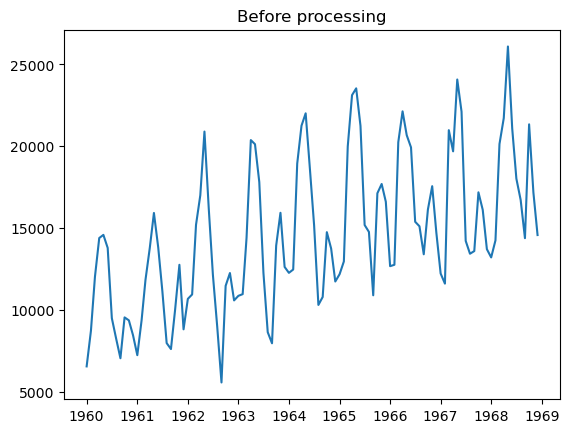

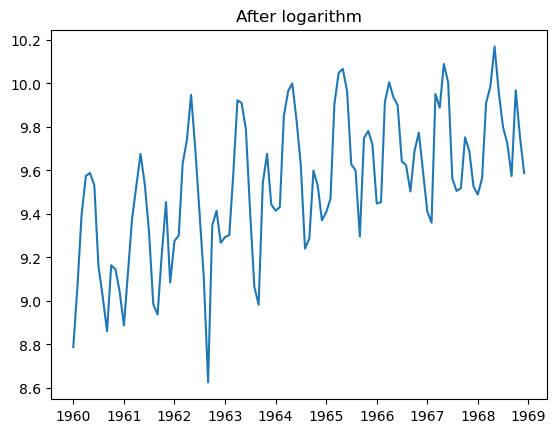

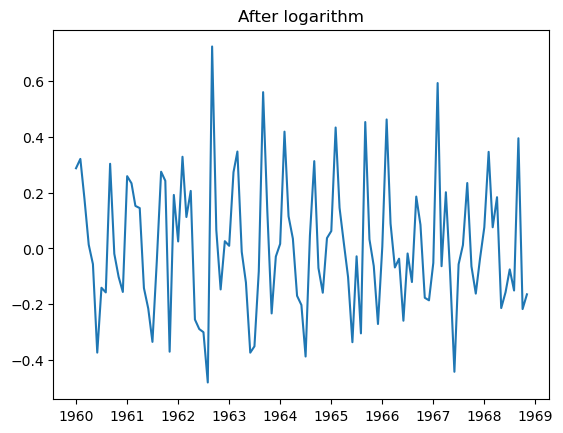

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [46]:
make_stationary(quebec)

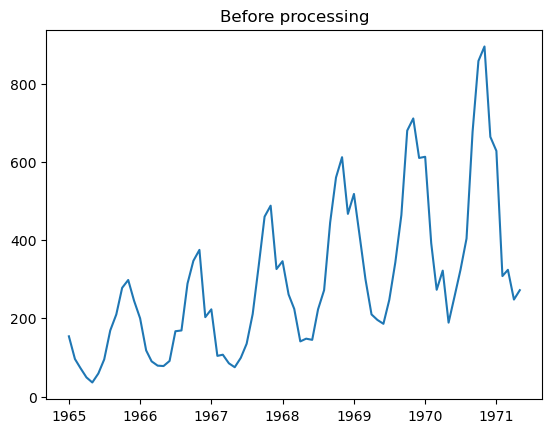

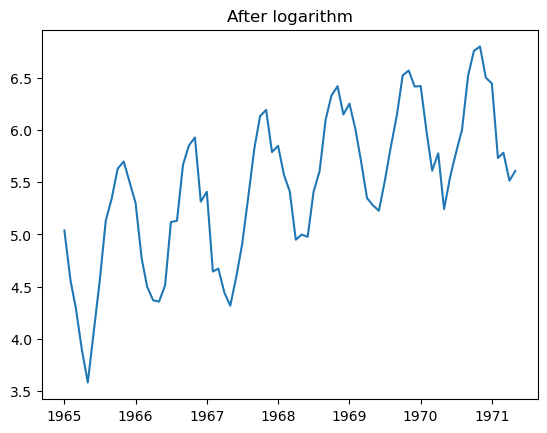

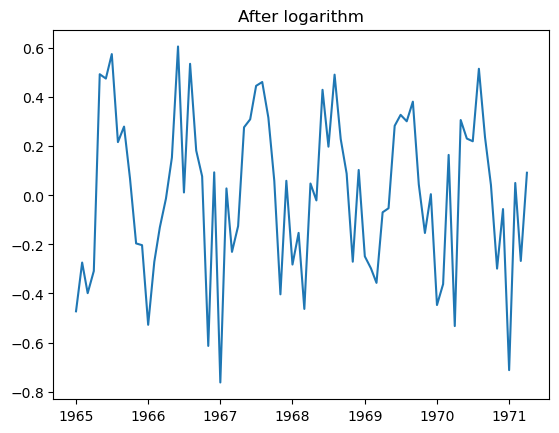

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


In [47]:
make_stationary(sales)